# Creating maps

To visualize the data, the data should be loaded using the `geopandas` package as explained in the previous section. Then use the `plot` function to visualize the data.

## Static maps

Using the `plot` function, without additional customization will produce a basic, static plot of the data with default settings.

In [37]:
import geopandas as gp
from pathlib import Path

INPUT = Path.cwd().parents[0] / "00_data"
gdb_path = INPUT / "LBM_2018_IS_DD_gdb" / "LBM_2018_IS_DD.gdb"

gdf = gp.read_file(gdb_path, layer="LBM2018_IS_DD")

In [7]:
lonmin, latmin, lonmax, latmax = gdf[100:110].total_bounds

clip the size for plotting

In [16]:
gdf_clipped = gp.clip(gdf, gdf[80:120].total_bounds)

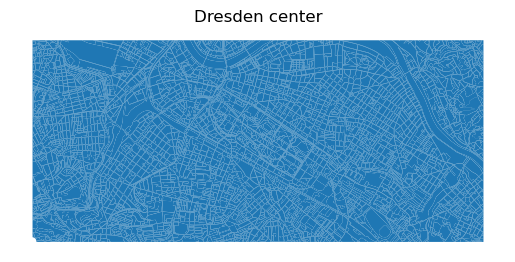

In [17]:
ax = gdf_clipped.plot()
ax.set_title('Dresden center')     #To add the title
ax.set_axis_off()                  #To remove the axis

To enhance the plot, you can customize the styling. In the following example parameter `column` shows the column that is mapped to color, parameter `cmap` defines the [color map](https://matplotlib.org/stable/gallery/color/colormap_reference.html#reverse-cmap), the parameter `legend` adds the legend and the parameter `legend_kwds` adds the legend label and defines the orientation.

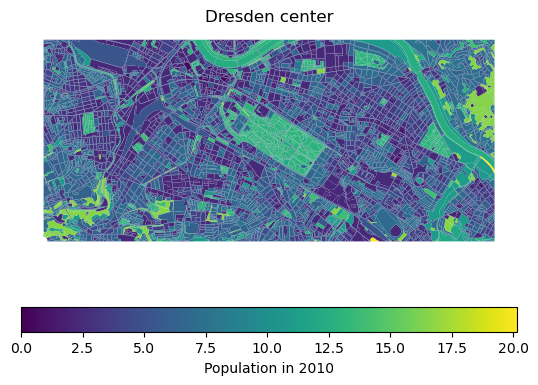

In [20]:
ax = gdf_clipped.plot(
    column='Biotpkt2018', cmap='viridis',
    legend=True,
    legend_kwds={"label": "Population in 2010", "orientation": "horizontal"})
ax.set_title('Dresden center')
ax.set_axis_off()

## Interactive maps

The [folium library](https://realpython.com/python-folium-web-maps-from-data/) could be used to create an interactive map from the data.

In [108]:
import folium

The first step is to create a base map using the `map` function. In order to focus the map on the area of interest and also to define the level of detail that is of interest, the area center is defined as `location` and the zoom level as `zoom-start`.

In [145]:
basemap = folium.Map(location=[51.0504, 13.7373], zoom_start=14)

`````{admonition} How to find coordinates and zoom levels
:class: tip
- **NOTE:** The easiest way to find the center coordinates and desired zoom level is to use online maps like [MapTiler](https://www.maptiler.com/maps/#style=streets-v2&lang=auto&mode=2d&position=14.48/51.0496/13.738) and [OpenStreeMap](https://www.openstreetmap.org/#map=13/51.04679/13.73111). Zoom in and out to find the optimal area and detail level, then check the URL for the information.
- **Example:** In the URL `14.48/51.0496/13.738`, 14.48 is the zoom level, 51.0496 is the latitude and 13.738 is the longitude.
`````

```{figure} ../images/11.png
:height: 150px
:name: figure-example

Set coordinates and zoom levels using URL in MapTiler
```

Clip to local area

In [146]:
local_area = gdf[82:88].total_bounds

In [147]:
gdf_clipped = gp.clip(gdf, local_area)

The data should now be added to the basemap. 

In [148]:
folium.GeoJson(gdf_clipped).add_to(basemap)

The map is displayed by calling the base map name.

In [150]:
basemap